# MDI 720
# TP1 - Partie II

## 2 Introduction à Pandas, Matplotlib, etc.
Deuxième partie du TP1 contenant deux parties

Le notebook suit le déroulé des questions tel qu'il est décrit dans l'énoncé disponible sous ce [lien](http://josephsalmon.eu/enseignement/TELECOM/MDI720/TP_intro_python_fr.pdf).

Toutefois, en amont des questions, une séries de commandes doivent être exécuter, à savoir:
* Importer les librairies Python
* Initialiser les représentations graphiques
* Importer les données
* Décrire rapidement les données
Une fois ces étapes accomplies, nous déroulerons les questions


### Importer les librairies Pyhton:

In [1]:
from os import path
import pandas as pd
import urllib
import zipfile
import sys
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline


### Initialiser les représentations graphiques:

In [2]:
imageformat = '.pdf'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.axes_style()
sns.set_style({'legend.frameon': True})
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]
my_blue = color_blind_list[0]

plt.close("all")


### Importer les données:

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename

# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
    else:
        if not(path.isfile('zipfilename')):
            urllib.urlretrieve(Location, zipfilename)
            
# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
na_values=na_values, usecols=fields)


### Décrire rapidement les données:

Les cinq premières lignes:

In [4]:
print(df.head())

         Date      Time  Global_active_power
0  16/12/2006  17:24:00                4.216
1  16/12/2006  17:25:00                5.360
2  16/12/2006  17:26:00                5.374
3  16/12/2006  17:27:00                5.388
4  16/12/2006  17:28:00                3.666


Résultats de la fonstion describe():

In [5]:
print(df.describe())

       Global_active_power
count        196268.000000
mean              1.352544
std               1.280684
min               0.104000
25%               0.314000
50%               1.072000
75%               1.992500
max              10.670000


Représentation graphique de la métrique:

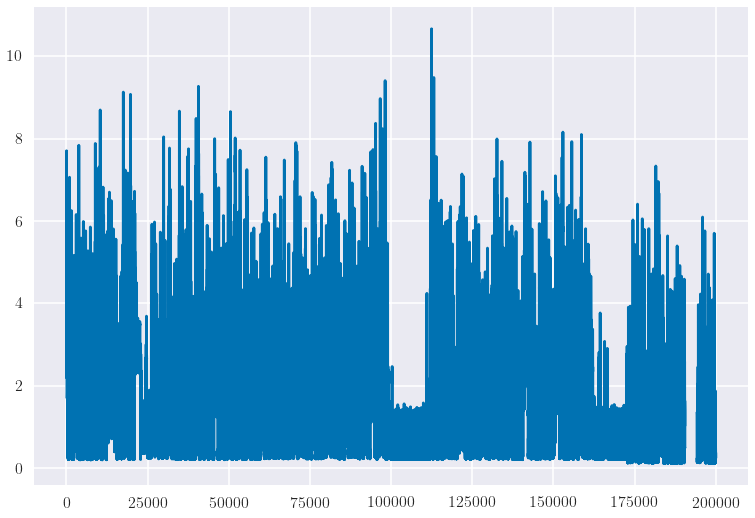

In [6]:
x = df.index
y = df['Global_active_power']

fig, ax = plt.subplots()

ax.plot(x, y, zorder=10)
plt.show()


### 1) Détecter et dénombrer le nombre de lignes ayant des valeurs manquantes
Nous pouvons détecter les valeurs manquantes grâce à la fonction pd.isnull()

In [7]:
df_null = df[df.isnull().any(1)] # any(1) pour récupérer toutes les lignes où au moins une colones est nulle
print(df_null.shape)

(3732, 3)


Il y a donc 3 732 valeurs manquantes sur un total de 196 268.


### 2) Supprimer toutes les lignes avec valeurs manquantes
Nous pouvons retirer du dataFrame initial les valeurs que nous avons détectées dans la précédente question

In [8]:
df_clean = df[~df.index.isin(df_null.index)] # '~' means 'not' for the method '.isin()'
print(df_clean.shape)

(196268, 3)



### 3) Créer une time series
Créons d'abord un nouvel index à partir des colonnes 'Date' et 'Time', en utilisant la fonction pd.to_datetime:

In [9]:
index_time = df_clean[['Date','Time']].apply(lambda x: pd.to_datetime(x[0]+ ' ' + x[1],dayfirst=True),axis=1)

0        2006-12-16 17:24:00
1        2006-12-16 17:25:00
2        2006-12-16 17:26:00
3        2006-12-16 17:27:00
4        2006-12-16 17:28:00
5        2006-12-16 17:29:00
6        2006-12-16 17:30:00
7        2006-12-16 17:31:00
8        2006-12-16 17:32:00
9        2006-12-16 17:33:00
10       2006-12-16 17:34:00
11       2006-12-16 17:35:00
12       2006-12-16 17:36:00
13       2006-12-16 17:37:00
14       2006-12-16 17:38:00
15       2006-12-16 17:39:00
16       2006-12-16 17:40:00
17       2006-12-16 17:41:00
18       2006-12-16 17:42:00
19       2006-12-16 17:43:00
20       2006-12-16 17:44:00
21       2006-12-16 17:45:00
22       2006-12-16 17:46:00
23       2006-12-16 17:47:00
24       2006-12-16 17:48:00
25       2006-12-16 17:49:00
26       2006-12-16 17:50:00
27       2006-12-16 17:51:00
28       2006-12-16 17:52:00
29       2006-12-16 17:53:00
                 ...        
199970   2007-05-04 14:14:00
199971   2007-05-04 14:15:00
199972   2007-05-04 14:16:00
199973   2007-

Ainsi nous pouvons remplacer le précédent index par le nouveau:

In [14]:
df_timeIndex = df_clean[['Global_active_power']].set_index(index_time) # seule la métrique compte désormais
df_timeIndex.head()

,Global_active_power
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666



### 4) Afficher le graphique des moyennes des températures journalières entre le 1er janvier et le 30 avril 2007
Filtrons dans un premier temps sur les dates comprises entre le 1er janvier et le 30 avril 2007:

In [15]:
df_dateFiltered = df_timeIndex['01/01/2007':'04/30/2007']
df_dateFiltered.head()

,Global_active_power
2007-01-01 00:00:00,2.580
2007-01-01 00:01:00,2.552
2007-01-01 00:02:00,2.550
2007-01-01 00:03:00,2.550
2007-01-01 00:04:00,2.554


Calculons maintenant la moyenne journalière des temparétures sur ces dates:

In [16]:
df_dateFiltered_dailyMean = df_dateFiltered.resample('D').mean()
df_dateFiltered_dailyMean.head()

,Global_active_power
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281


Enfin, produisons le graphique correspondant:

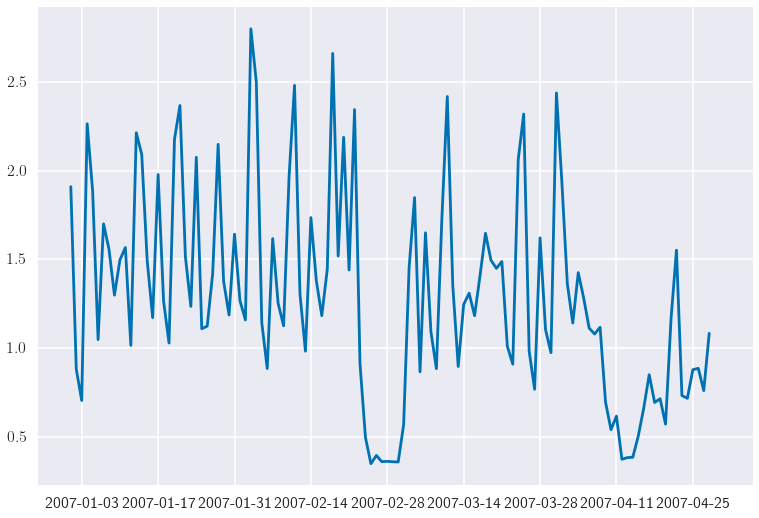

In [17]:
x = df_dateFiltered_dailyMean.index
y = df_dateFiltered_dailyMean['Global_active_power']

fig, ax = plt.subplots()

ax.plot(x, y, zorder=10)
plt.show()